In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pickle

def load(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

stability_data = load('data/stability-data.pkl')

In [127]:
print(stability_data.keys(), '\n')
print(stability_data['true distribution'].keys(), '\n')
print(stability_data['opt-based imputer'].keys(), '\n')
print(stability_data['opt-based imputer'][10].keys())

dict_keys(['true distribution', 'naive imputer', 'opt-based imputer', 'direct imputer', 'direct imputer (half)', 'opt-based imputer (half)']) 

dict_keys(['pdf', 'sample', 'N', 'minor expectiles', 'major expectiles']) 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]) 

dict_keys(['iteration', 'sample', 'N', 'minor_expectiles', 'major_expectiles'])


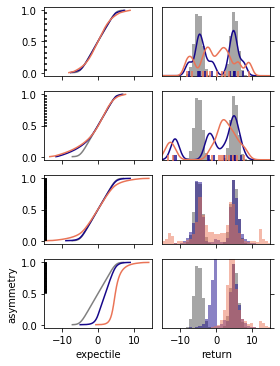

In [123]:
from scipy import stats
fig, axes = plt.subplots(4, 2, figsize=(4, 5.2), sharex='col', sharey='col')

c = plt.cm.plasma

all_samples = np.concatenate(
    [stability_data[k][t]['sample']
         for k in ['opt-based imputer', 'opt-based imputer (half)',
                   'direct imputer',    'direct imputer (half)'   ]
         for t in [0, 50]
    ]
)

s_range = all_samples.min(), all_samples.max()
support = np.linspace(*s_range, 500)
bins =  np.linspace(*s_range, 50)

for i, k in enumerate(['opt-based imputer', 'opt-based imputer (half)',
                       'direct imputer',    'direct imputer (half)'   ]):
    log = stability_data[k]
    # expectiles
    axes[i, 0].plot(*log[0]['minor_expectiles'], color="gray")
    taus = log[0]['major_expectiles'][1]
    axes[i, 0].scatter(np.full_like(taus, -15), taus,
                       marker="_", color="black", zorder=10)
    # samples
    axes[i, 1].yaxis.set_label_position("right")
    axes[i, 1].yaxis.tick_right()
    axes[i, 1].hist(log[0]['sample'], density=True, bins=bins, alpha=0.7, color="gray")
    for t in [1, 50]:
        color = c(t / 77)
        axes[i, 0].plot(*log[t]['minor_expectiles'], color=color)
        if i < 2:
            kd = stats.gaussian_kde(log[t]['sample'], bw_method=0.18)
            axes[i, 1].plot(support, kd.pdf(support), color=color)
            axes[i, 1].scatter(log[t]['sample'], np.zeros_like(log[1]['sample']),
                               marker="|", color=color, s=100, zorder=10)
        else:
            axes[i, 1].hist(log[t]['sample'], density=True, bins=bins, alpha=0.5,
                           color=color)

# axes[i, 0].set_ylim([0, 1])
axes[i, 0].set_xlim([-15, 15])
axes[i, 1].set_ylim([0, 0.2])
axes[i, 1].set_xlim([-15, 15])
axes[i, 1].set_yticklabels([])
axes[i, 0].set_ylabel("asymmetry")
axes[i, 0].set_xlabel("expectile")
axes[i, 1].set_xlabel("return")
    
plt.tight_layout()
plt.show()